<a href="https://colab.research.google.com/github/zomorodiyan/MAE-5093/blob/main/MAE5093_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 2** of the course **MAE-5093** Fall 2021, questions **2, 3, 4, 6, 8** from **Fundamentals of Engineering Numerical Analysis** Second Edition

<h2>by Mehrdad Zomorodiyan<h2>

link to the questions: https://drive.google.com/file/d/1mAihH4eMKmAP0l-MJe6PEcs0h91mNRYa/view?usp=sharing 

In [ ]:
#@title Setup
#!pip install sympy
from sympy import symbols, diff, poly, Function, factorial, Matrix, zeros
import numpy as np
x, h, a, b = symbols('x, h, a, b')
a1, a2, a3, a4, a5, a6 = symbols('a1, a2, a3, a4, a5, a6')                      
f = Function('f')

In [ ]:
#@title define tay
#define tay(j,k) that returns taylor_expansion, j:distance from x, k:number of terms from taylor serie
def tay(j,k): return sum((h*j)**i/factorial(i)*f(x).diff(x, i) for i in range(abs(k)))

In [ ]:
#@title two tests for tay
import unittest
class TestTaylor(unittest.TestCase):
    def test_2terms(self):
        '''Test case function for first 2 terms of taylor series for f(x+1)'''
        result = tay(1,2)
        expected = f(x) + h*f(x).diff(x,1)
        self.assertEqual(result, expected)
    def test_3terms(self):
        '''Test case function for first 3 terms of taylor series for f(x-2)'''
        result = tay(-2,3)
        expected = f(x) - 2*h*f(x).diff(x,1) + 2*h**2*f(x).diff(x,2)
        self.assertEqual(result, expected)


In [ ]:
#@title define equation (helper method for disceritize)
def equation(vars,order,coeffs,coeffs2,orders\
        ,x=symbols('x'),h=symbols('h'),f=Function('f')):
    return sum( vars[i]*tay(coeffs[i],order).diff(x,orders[i])*coeffs2[i]\
            for i in range(len(vars)) )

In [ ]:
#@title define discretize
# gets a set of coeficient(vars),number of terms for taylor expansions(order),
#   distance from the refrence point for each term (coeffs) also known
#   coeficients for each(coeffs2), order of derivetive for each term(orders)
# returns the solution for the unknowns in vars
def discretize(vars,nvars,coeffs,coeffs2,orders\
        ,x=symbols('x'),h=symbols('h'),f=Function('f')):
    mat1 = zeros(nvars,nvars)
    mat2 = zeros(nvars,1)
    order=nvars-1 #start here, will go higher if some equations are always-true
    eq_count = 0
    while(eq_count < nvars):
        eq_count = 0
        eq = equation(vars,order,coeffs,coeffs2,orders)
        for i in range(order):
            p = poly(eq,[f(x).diff(x,i)]); c = p.coeffs()[0]
            mat2[i,0] = -c
            nonzero=False
            for j in range(nvars):
                C = poly(c,[vars[j]]).coeffs()
                if len(C)==2:
                    mat1[eq_count,j] = C[0]
                    mat2[eq_count,0] += C[0]*vars[j]
                    nonzero=True
            if nonzero:
                eq_count += 1
        if eq_count < nvars:
            #print('order',order,'is not enough; go higher')
            order += 1
    return (mat1.inv()*mat2)[:,0]

In [ ]:
#@title test for discretize: $\frac{du}{dx}|_j= \frac{1}{2h}(a_1 u_{j}+a_2 u_{j+1}+a_3 u_{j+2})+O(h^n)$ $∴[a_1,a_2,a_3]=[-3,4,-1]$
class TestDiscretize(unittest.TestCase):
    def test_eq21(self):
        vars = Matrix([a1,a2,a3,1]); nvars = len(vars)-1 #n of unknowns
        coeffs=[0,1,2,0]
        coeffs2=[1/2/h,1/2/h,1/2/h,-1]
        orders=[0,0,0,1]
        result = discretize(vars,nvars,coeffs,coeffs2,orders)
        expected = Matrix([[-3],[4],[-1]])
        self.assertEqual(result, expected)


In [ ]:
#@title run tests
unittest.main(argv=[''], verbosity=1, exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.741s

OK


### **Question 2**

In [ ]:
#@title define variables of $\frac{du}{dx}|_j= \frac{1}{h}(a_1 u_{j-1}+a_2 u_{j}+a_3 u_{j+1}+a_4 u_{j+2})+O(h^n)$
vars = Matrix([a1,a2,a3,a4,1]); nvars = len(vars)-1 #n of unknowns
coeffs=[-1,0,1,2,0]
coeffs2=[1/h,1/h,1/h,1/h,-1]
orders=[0,0,0,0,1]

In [ ]:
#@title calculate $result =[a_1,a_2,a_3,a_4]$ , form the equation, show  $lhs - rhs$
result = discretize(vars,nvars,coeffs,coeffs2,orders)
num = 6
eq = f(x).diff(x,1) - equation(result,num,coeffs,coeffs2,orders) 
for i in range(num):
  p = poly(eq,[f(x).diff(x,i)]); c = p.coeffs()
  print(0 if len(c)==1 else c[0],"f"+"'"*i, end=' + ')


0 f + 0 f' + 0 f'' + 0 f''' + h**3/12 f'''' + h**4/30 f''''' + 

the leading error term is $\frac{h^3}{12}f''''_{xi}$ so the **order is $3$**

### **Question 3**

the fourth-order pade scheme: $f'_{i-1}+f'_{i}+4f'_{i+1} = \frac{3}{h}(f_{i+1}-f_{i-1})$

$f_i = e^{ikx_i}⇒ik'(e^{ik(x_i-h)}+4e^{ikx_i}+e^{ik(x_i+h)}) = \frac{3}{h}(e^{ik(x_i+h)}-e^{ik(x_i-h)})$

$⇒ik'(e^{-ikh}+4+e^{ikh}) = \frac{3}{h}(e^{ikh}-e^{-ikh})$

$⇒ ik'(4+2cos(kh))=\frac{3}{h}(2i sin(kh))$

$⇒ k'=\frac{3sin(kh)}{h(2+cos(kh))}$

### **Question 4**

In [ ]:
#@title define variables according to the equation 
vars = Matrix([a1,a2,a3,a4,1,1]); nvars = len(vars)-2 #n of unknowns
coeffs=[0,1,2,3,0,1]
coeffs2=[1/h,1/h,1/h,1/h,-1,-a]
orders=[0,0,0,0,1,1]

<h3>4-a<h3>

In [ ]:
#@title calculate $result =[a,b,c,d]$ , form the equation, show  $lhs - rhs$
result = discretize(vars,nvars,coeffs,coeffs2,orders)
print('[a,b,c,d]=',result)
num = 6
eq = f(x).diff(x,1) + a*tay(1,num).diff(x,1) - equation(result,num,coeffs,coeffs2,orders) 
for i in range(num):
  p = poly(eq,[f(x).diff(x,i)]); c = p.coeffs()
  print(0 if len(c)==1 else c[0],"f"+"'"*i, end=' + ')


[a,b,c,d]= Matrix([[-a/3 - 11/6], [3 - a/2], [a - 3/2], [1/3 - a/6]])
0 f + 0 f' + 0 f'' + 0 f''' + a*h**3/12 - h**3/4 f'''' + 7*a*h**4/60 - 3*h**4/10 f''''' + 

$\alpha=9$ would makes leading error term, $\frac{\alpha-9}{12}f''''_{xi}$ zero consequently the order of accuracy will be four

<h3>4-b<h3>

In [ ]:
#@title substitude $\alpha$ with 9 as we concluded in 4-a
resultsub = result.subs(a,9)
print('[a,b,c,d]=',resultsub)

[a,b,c,d]= Matrix([[-29/6], [-3/2], [15/2], [-7/6]])


### **Question 6**

<h3> 6-a <h3>

central difference scheme: $f''_{j} = \frac{f_{j+1}-2f_{j} +f_{j-1}}{h^2}$

$f_i = e^{ikx_i}⇒ -k'^2f_j = \frac{f_{j}(e^{ikh}-2 +e^{-ikh})}{h^2}$

$⇒ k'^2h^2 = -2(cos(kh)-1)$





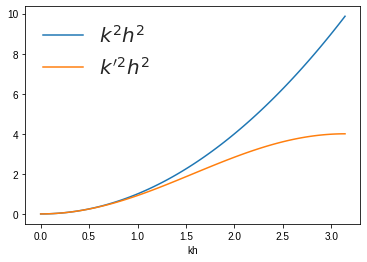

In [ ]:
#@title plot
import matplotlib.pyplot as plt
kh = np.linspace(0,3.1415,100)
kh2 = kh**2
kph2 = -2*(-1+np.cos(kh))
plt.plot(kh,kh2)
plt.plot(kh,kph2)
plt.style.use('seaborn-whitegrid')
plt.xlabel("kh")
plt.legend(["$k^2h^2$","$k'^2h^2$"], prop={"size":20})

<h3> 6-b <h3>

In [ ]:
#@title define variables according to the equation 
vars = Matrix([1,-2,1,1,1,1]); nvars = len(vars)-2 #n of unknowns
coeffs=[-1,0,1,-1,0,1]
coeffs2=[1/h**2,1/h**2,1/h**2,-1/12,-10/12,-1/12]
orders=[0,0,0,2,2,2]

In [ ]:
#@title form the equation, show  $lhs - rhs$
num = 7
eq = equation(vars,num,coeffs,coeffs2,orders) 
for i in range(num):
  p = poly(eq,[f(x).diff(x,i)]); c = p.coeffs()
  print(0 if len(c)==1 else c[0],"f"+"'"*i, end=' + ')


0 f + 0 f' + 0 f'' + 0 f''' + 0 f'''' + 0 f''''' + -0.00416666666666667*h**4 f'''''' + 

the leading error term is $\frac{25h^{4}}{6000}f''''_{xi}$ so the **order is $4$**

<h3> 6-c <h3>

the fourth-order pade scheme: $\frac{1}{12}f''_{i-1}+\frac{10}{12}f''_{i}+\frac{1}{12}f'_{i+1} = \frac{f_{i+1}-2f_i+f_{i-1}}{h^2}$

$f_i = e^{ikx_i}⇒-k'^2(\frac{1}{12}e^{-ikh}+\frac{10}{12}+\frac{1}{12}e^{ikh})f_i = (\frac{e^{ikh}-2+e^{-ikh}}{h^2})f_i$

$⇒ -k'^2(\frac{2}{12}cos(kh)+\frac{10}{12}) = \frac{2cos(kh)-2}{h^2}$

$⇒ k'^2h^2 = \frac{1-cos(kh)}{\frac{1}{12}cos(kh)+\frac{5}{12}}$

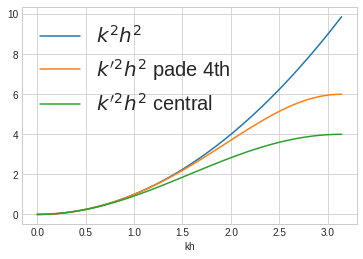

In [ ]:
#@title plot
import matplotlib.pyplot as plt
kh = np.linspace(0,3.1415,100)
kh2 = kh**2
kph2pade = (1-np.cos(kh))/(1/12*np.cos(kh)+5/12)
kph2central = -2*(-1+np.cos(kh))
plt.plot(kh,kh2)
plt.plot(kh,kph2pade)
plt.plot(kh,kph2central)
plt.style.use('seaborn-whitegrid')
plt.xlabel("kh")
plt.legend(["$k^2h^2$","$k'^2h^2$ pade 4th","$k'^2h^2$ central"], prop={"size":20})

<h3> 6-d <h3>

$ k'^2h^2 = \frac{1-cos(kh)}{\frac{1}{12}cos(kh)+\frac{5}{12}}$

$ cos(x) = 1-\frac{x^2}{2}+\frac{x^4}{24}+O(x^6) ⇒ k'^2h^2 = \frac{\frac{k^2h^2}{2}-\frac{k^4h^4}{24}+O(k^6h^6)}{\frac{1}{2}-\frac{k^2h^2}{24}+O(K^4h^4)}$

$ ∴ k'^2h^2 - k^2h^2 = \frac{O(k^6h^6)}{\frac{1}{2}-\frac{k^2h^2}{24}+O(K^4h^4)}= O(k^6h^6)$

$k'^2h^2 = \frac{\frac{k^2h^2}{2}-\frac{k^4h^4}{24}+O(k^6h^6)}{\frac{1}{2}-\frac{k^2h^2}{24}+O(K^4h^4)} ⇒ \lim_{kh\to0} k'^2h^2 = k^2h^2$ 

$∴\lim_{kh\to0} \frac{k'^2h^2}{k^2h^2} = \frac{k^2h^2}{k^2h^2} = 1 $




### **Question 8**

<h3> 8-a <h3>

<h3> 8-b <h3>